In [1]:
#Importing data from json file
import pandas as pd       
train = pd.read_json("C:/Users/Nitin/Desktop/Desktop FOlder/Study Material/Semester 2/BIA 660/Assgnmnt/Assignment 3/reviews.json",orient='records',lines=True)

train.tail()
train.shape
train.dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 5 columns):
author    870 non-null object
body      870 non-null object
date      870 non-null datetime64[ns]
rating    870 non-null object
title     870 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 34.1+ KB


In [2]:
"""
Reference1: https://stackoverflow.com/questions/39512002/convert-whole-dataframe-from-lower-case-to-upper-case-with-pandas/39512116
Reference2: https://stackoverflow.com/questions/39782418/remove-punctuations-in-pandas?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
"""
#Change comment/title/body to lower case: to avoid distinguish between words simply on case

train = train.apply(lambda x: x.astype(str).str.lower())

#Removing "out of 5 stars" from rating and coverting it to integer
def clean(x):
    x = str(x)
    x = x.replace("out of 5 stars", "")
    return int(float(x))


train["title"] = train['title'].str.replace('[^\w\s]','')
train["body"] = train['body'].str.replace('[^\w\s]','')
train["rating"] = train["rating"].apply(clean)

train.head()

,author,body,date,rating,title
0,gregory e. howard,these were exactly the model i was hoping for ...,2018-04-21,5,offer a light easily bright enough for the guy...
1,sue,its a great bright led light perfect for the c...,2018-04-20,5,dependable
2,sajjatul i nobel,compare to the price not bad used only one day...,2018-04-19,5,good product cheap price
3,margil flores,the light is nice,2018-04-19,5,five stars
4,amazon customer,very bright,2018-04-19,5,five stars


In [3]:
#basic EDA

train.shape
train.dtypes
train.columns.values

array(['author', 'body', 'date', 'rating', 'title'], dtype=object)

In [4]:
print (train["body"][0])

these were exactly the model i was hoping for even tho the brand name is different than the two i bought 3 years ago they are solid well constructed offer a light easily bright enough for the guy with old eyes and my original two never eat batteries i may get another 4pack so ill have one in every room of the house


In [5]:
#Import nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stop = set(stopwords.words('english'))
ps = PorterStemmer()
#adding stopwords
train["body"] = train["body"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train['title'] = train['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train.head()

,author,body,date,rating,title
0,gregory e. howard,exactly model hoping even tho brand name diffe...,2018-04-21,5,offer light easily bright enough guy old eyes
1,sue,great bright led light perfect car walking dog...,2018-04-20,5,dependable
2,sajjatul i nobel,compare price bad used one day cant say anything,2018-04-19,5,good product cheap price
3,margil flores,light nice,2018-04-19,5,five stars
4,amazon customer,bright,2018-04-19,5,five stars


In [6]:
#Removing date and Author from dataframe

train = train[['title', 'body','rating']].copy()
train.to_json("C:/Users/Nitin/Desktop/Desktop FOlder/Study Material/Semester 2/BIA 660/Assgnmnt/Assignment 3/train.json",lines=True, orient = 'records')
train.to_csv("C:/Users/Nitin/Desktop/Desktop FOlder/Study Material/Semester 2/BIA 660/Assgnmnt/Assignment 3/train.csv")

In [7]:
train.head()

,title,body,rating
0,offer light easily bright enough guy old eyes,exactly model hoping even tho brand name diffe...,5
1,dependable,great bright led light perfect car walking dog...,5
2,good product cheap price,compare price bad used one day cant say anything,5
3,five stars,light nice,5
4,five stars,bright,5


count    870.000000
mean       0.783908
std        0.411814
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: rating, dtype: float64


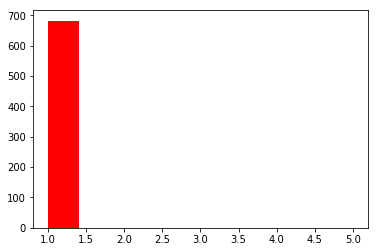

In [17]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
print(train.rating.describe())
plt.hist( train.rating, range=[1, 5], facecolor='red', align='mid')
plt.show()

In [9]:
#Let us check how the rating is divided
train['rating'].value_counts()

5    563
4    119
1     81
3     54
2     53
Name: rating, dtype: int64

In [10]:
#changing date to binary classifier
# 0 = rating 1, 2 or 3 which is equivalent to average or bad or negative. Underlying assumption is that customer may not recommend the flashlight his/her friends and family.
# 1 = rating 4 or 5, which is equivalent to good/positive rating. Underlying assumption is that customer would recommend the flashlight or service his/her friends and family.

train['rating'] = [1 if star >= 4 else 0 for star in train['rating']]

In [11]:
#bag of words
from sklearn import preprocessing, metrics, cross_validation
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(2, 2),max_features = 300)
#pd.concat([train_df , score_df])
X1 = cv.fit_transform(train["body"]).toarray()
X2 = cv.fit_transform(train["title"]).toarray()
Y = train.iloc[:, 2:3].values
#y = df_upsampled.rating
#X = df_upsampled.drop('rating', axis=1)

C:\Users\Nitin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.20, random_state = 0)

In [13]:
#Applying Logistic Regression on baised data

In [16]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
#X2_train = sc.fit_transform(X2_train)
X1_test = sc.transform(X1_test)
#X2_test = sc.transform(X2_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X1_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X1_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)
accuracy=cm.trace()/cm.sum()
print(accuracy)

[[ 12  27]
 [ 21 114]]
0.7241379310344828


C:\Users\Nitin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Nitin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#logistic regression producing accuracy of 72.4%

In [ ]:
#Now applying Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier (min_samples_leaf=1,min_samples_split=8,n_estimators=500,max_depth=None,random_state=123)
forest.fit(X1_train,y_train)
y1_pred_rf = forest.predict(X1_test)

from sklearn.metrics import confusion_matrix
rfcm=confusion_matrix(y_test,y1_pred_rf)
print(rfcm)
rfaccuracy=rfcm.trace()/rfcm.sum()
print(rfaccuracy)

C:\Users\Nitin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[  6  33]
 [  5 130]]
0.7816091954022989


In [ ]:
#Random Forest produced accuracy of 78%